# Enfoque clasico de series de tiempo

**Estadistica Aplicada**

**Alan Fernando Del Real Almaguer**

**Sesion 12 - 16 marzo 2023**

En el enfoque clasico de series de tiempo, series considera que la serie tiene 4 componentes:
1. Tendencia
2. Ciclo
3. Estacional
4. Irregular

Usualmente se considera qu la tendencia y el ciclo vienen juntos por lo que se habla de la tendencia-ciclo (tendencia

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Modelo ETS Error Trend-Seasonally (Tendencia ciclo estacional irregular)
from statsmodels.tsa.api import seasonal_decompose

In [6]:
# datos
pasajeros_avion=pd.read_csv("https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv", index_col="Month",parse_dates=True)
pasajeros_avion

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [11]:
pasajeros_avion=pasajeros_avion.rename(columns={"Thousands of Passengers":"Miles de pasajeros"})
pasajeros_avion

,Miles de pasajeros
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
# Mostramos el index del dataframe y fijamos la frecuencia
pasajeros_avion.index.freq="MS"
pasajeros_avion.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

Text(0.5, 0, 'Año - Mes')

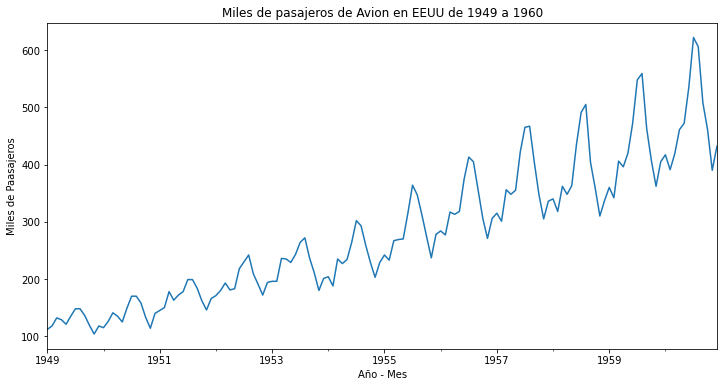

In [20]:
pasajeros_avion["Miles de pasajeros"].plot(figsize=(12,6))
plt.title("Miles de pasajeros de Avion en EEUU de 1949 a 1960")
plt.ylabel("Miles de Paasajeros")
plt.xlabel("Año - Mes")

<function matplotlib.pyplot.show(close=None, block=None)>

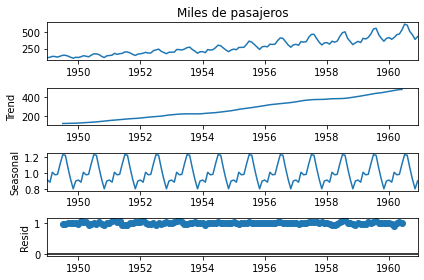

In [29]:
serie1=seasonal_decompose(pasajeros_avion["Miles de pasajeros"],model="multiplicative")
serie1.plot()
plt.show

In [30]:
serie1.seasonal.head(12)

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Freq: MS, Name: seasonal, dtype: float64

<AxesSubplot:xlabel='Month'>

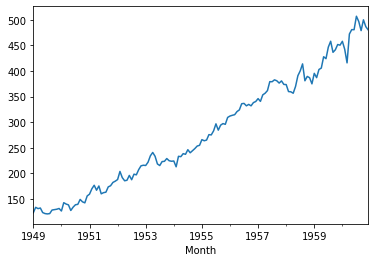

In [58]:
# desestacionalizar
# vamos a quitar el componente estacional
pasajeros_avion["desestacionalizada"]=pasajeros_avion["Miles de pasajeros"]/serie1.seasonal
pasajeros_avion["desestacionalizada"].plot()

**COVID 19**

In [59]:
confirmados_mex=pd.read_excel("covid_estatus.xlsx")

In [60]:
confirmados_mex.head()

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [61]:
confirmados_mex["fecha"]= pd.to_datetime(confirmados_mex["fecha"])

In [62]:
confirmados_mex=confirmados_mex.set_index("fecha")

In [63]:
confirmados_mex.index.freq="D"

(0.0, 800.0)

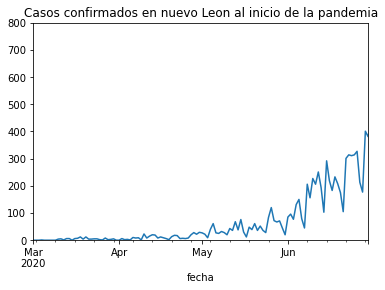

In [66]:
confirmados_mex["nuevo leon"].plot()
plt.title("Casos confirmados en nuevo Leon al inicio de la pandemia")
plt.xlim("2020-03-01", "2020-06-30")
plt.ylim(0,800)

(18932.0, 19051.0)

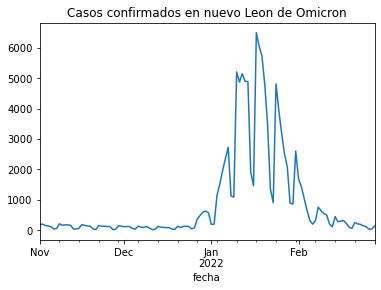

In [72]:
confirmados_mex["nuevo leon"].plot()
plt.title("Casos confirmados en nuevo Leon de Omicron")
plt.xlim("2021-11-01", "2022-02-28")


Text(0.5, 1.0, 'Casos confirmados en nuevo Leon durante la pandemia')

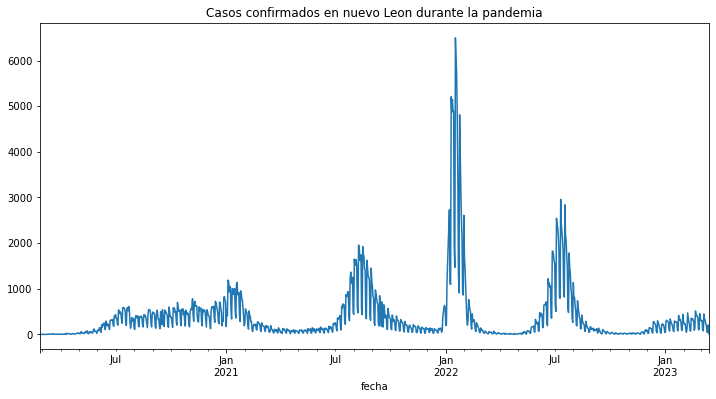

In [73]:
confirmados_mex["nuevo leon"].plot(figsize=(12,6))
plt.title("Casos confirmados en nuevo Leon durante la pandemia")


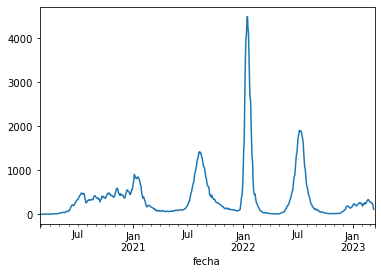

In [75]:
serie2=seasonal_decompose(confirmados_mex["nuevo leon"])
serie2.trend.plot()
plt.show()